## Import Data, divide data into Tshirt boot set, Pullover Coat set, and all class set

In [1]:
import numpy as np
from fashion_mnist_dataset.utils import mnist_reader
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load datasets
X_train_mnist, y_train_mnist = mnist_reader.load_mnist('fashion_mnist_dataset/data/fashion', kind='train')
X_test_mnist, y_test_mnist = mnist_reader.load_mnist('fashion_mnist_dataset/data/fashion', kind='t10k')


# Train data for tshirt(0) and boot(9)
X_train_tshirt_boot = np.array([image for image, label in zip(X_train_mnist, y_train_mnist) if label == 0 or label == 9])
y_train_tshirt_boot = np.array([0 if label == 0 else 1 for image, label in zip(X_train_mnist, y_train_mnist) if label == 0 or label == 9])

X_test_tshirt_boot = np.array([image for image, label in zip(X_test_mnist, y_test_mnist) if label == 0 or label == 9])
y_test_tshirt_boot = np.array([0 if label == 0 else 1 for image, label in zip(X_test_mnist, y_test_mnist) if label == 0 or label == 9],dtype='f')

# Train data for pullover(2) and coat(4)
X_train_pullover_coat = np.array([image for image, label in zip(X_train_mnist, y_train_mnist) if label == 2 or label == 4])
y_train_pullover_coat = np.array([0 if label == 2 else 1 for image, label in zip(X_train_mnist, y_train_mnist) if label == 2 or label == 4])

X_test_pullover_coat = np.array([image for image, label in zip(X_test_mnist, y_test_mnist) if label == 2 or label == 4])
y_test_pullover_coat = np.array([0 if label == 2 else 1 for image, label in zip(X_test_mnist, y_test_mnist) if label == 2 or label == 4])

# Train data for all classes
X_train_all_class = X_train_mnist
y_train_all_class = np.eye(10)[y_train_mnist]

X_test_all_class = X_test_mnist
y_test_all_class = np.eye(10)[y_test_mnist]

## Shuffle data into random order, and validate their dimensions

In [2]:
# Shuffle
shuffled_indices = np.random.permutation(len(X_train_tshirt_boot))
X_train_tshirt_boot = X_train_tshirt_boot[shuffled_indices]
y_train_tshirt_boot = y_train_tshirt_boot[shuffled_indices].reshape(-1,1)

shuffled_indices = np.random.permutation(len(X_test_tshirt_boot))
X_test_tshirt_boot = X_test_tshirt_boot[shuffled_indices]
y_test_tshirt_boot = y_test_tshirt_boot[shuffled_indices].reshape(-1, 1)

shuffled_indices = np.random.permutation(len(X_train_pullover_coat))
X_train_pullover_coat = X_train_pullover_coat[shuffled_indices]
y_train_pullover_coat = y_train_pullover_coat[shuffled_indices].reshape(-1,1)

shuffled_indices = np.random.permutation(len(X_test_pullover_coat))
X_test_pullover_coat = X_test_pullover_coat[shuffled_indices]
y_test_pullover_coat = y_test_pullover_coat[shuffled_indices].reshape(-1, 1)

shuffled_indices = np.random.permutation(len(X_train_all_class))
X_train_all_class = X_train_all_class[shuffled_indices]
y_train_all_class = y_train_all_class[shuffled_indices]

shuffled_indices = np.random.permutation(len(X_test_all_class))
X_test_all_class = X_test_all_class[shuffled_indices]
y_test_all_class = y_test_all_class[shuffled_indices]

print("X train dim:",X_train_tshirt_boot.shape,X_train_pullover_coat.shape)
print("X test dim:",X_test_tshirt_boot.shape,X_test_pullover_coat.shape)

print("Y train dim:",y_train_tshirt_boot.shape,y_train_pullover_coat.shape)
print("Y test dim:",y_test_tshirt_boot.shape,y_test_pullover_coat.shape)

X train dim: (12000, 784) (12000, 784)
X test dim: (2000, 784) (2000, 784)
Y train dim: (12000, 1) (12000, 1)
Y test dim: (2000, 1) (2000, 1)


In [3]:
# Normalization
def matrix_norm(mat):
    mat_t = mat.T
    for i in range(mat_t.shape[0]):
        
        ma = max(mat_t[i])
        mi = min(mat_t[i])
        interval = ma - mi
        if ma - mi == 0:
            continue
        else:
            mat_t[i] = np.true_divide(mat_t[i] - mi, ma - mi)
    return mat_t.T


X_train_tshirt_boot = np.array(matrix_norm(np.array(X_train_tshirt_boot, dtype='double')), dtype = 'double')
X_test_tshirt_boot = np.array(matrix_norm(np.array(X_test_tshirt_boot, dtype='double')), dtype='double')

X_train_pullover_coat = np.array(matrix_norm(np.array(X_train_pullover_coat, dtype='double')), dtype = 'double')
X_test_pullover_coat = np.array(matrix_norm(np.array(X_test_pullover_coat, dtype='double')), dtype = 'double')

X_train_all_class = np.array(matrix_norm(np.array(X_train_all_class, dtype='double')), dtype = 'double')


print("X train dim:",X_train_tshirt_boot.shape,X_train_pullover_coat.shape)
print("X test dim:",X_test_tshirt_boot.shape,X_test_pullover_coat.shape)

print("Y train dim:",y_train_tshirt_boot.shape,y_train_pullover_coat.shape)
print("Y test dim:",y_test_tshirt_boot.shape,y_test_pullover_coat.shape)

X train dim: (12000, 784) (12000, 784)
X test dim: (2000, 784) (2000, 784)
Y train dim: (12000, 1) (12000, 1)
Y test dim: (2000, 1) (2000, 1)


In [4]:
# Principal component analysis (PCA)
def pca(A):
    mean = np.mean(A, axis = 0)
    centered = A - mean
    covariance_matrix = np.cov(centered.T)
    eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)
    
    return np.fliplr(eigen_vectors)

pc_tshirt_boot = pca(X_train_tshirt_boot)
pc_pullover_coat = pca(X_train_pullover_coat)
pc_all_class = pca(X_train_all_class)


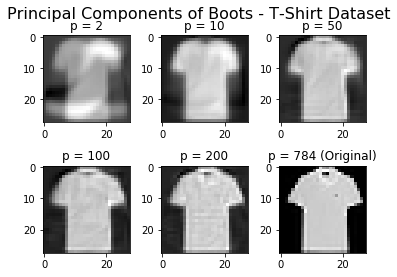

In [5]:
# Visualize PCs for boots & t-shirt
sample_image = X_train_tshirt_boot[np.random.choice(len(X_train_tshirt_boot)), :]

pc_tshirt_boot_2 = (sample_image @ pc_tshirt_boot[:, :2] @ pc_tshirt_boot[:, :2].T)
pc_tshirt_boot_10 = (sample_image @ pc_tshirt_boot[:, :10] @ pc_tshirt_boot[:, :10].T)
pc_tshirt_boot_50 = (sample_image @ pc_tshirt_boot[:, :50] @ pc_tshirt_boot[:, :50].T)
pc_tshirt_boot_100 = (sample_image @ pc_tshirt_boot[:, :100] @ pc_tshirt_boot[:, :100].T)
pc_tshirt_boot_200 = (sample_image @ pc_tshirt_boot[:, :200] @ pc_tshirt_boot[:, :200].T)
pc_tshirt_boot_784 = (sample_image @ pc_tshirt_boot[:, :784] @ pc_tshirt_boot[:, :784].T)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('Principal Components of Boots - T-Shirt Dataset', fontsize = 16)
axs[0, 0].set_title('p = 2')
axs[0, 0].imshow(pc_tshirt_boot_2.reshape((28, 28)), cmap='gray')
axs[0, 1].set_title('p = 10')
axs[0, 1].imshow(pc_tshirt_boot_10.reshape((28, 28)), cmap='gray')
axs[0, 2].set_title('p = 50')
axs[0, 2].imshow(pc_tshirt_boot_50.reshape((28, 28)), cmap='gray')
axs[1, 0].set_title('p = 100')
axs[1, 0].imshow(pc_tshirt_boot_100.reshape((28, 28)), cmap='gray')
axs[1, 1].set_title('p = 200')
axs[1, 1].imshow(pc_tshirt_boot_200.reshape((28, 28)), cmap='gray')
axs[1, 2].set_title('p = 784 (Original)')
axs[1, 2].imshow(pc_tshirt_boot_784.reshape((28, 28)), cmap='gray')

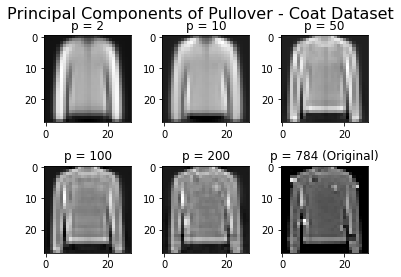

In [6]:
# Visualize PCs for pullover & coat
sample_image = X_train_pullover_coat[np.random.choice(len(X_train_tshirt_boot)), :]

pc_pullover_coat_2 = (sample_image @ pc_pullover_coat[:, :2] @ pc_pullover_coat[:, :2].T)
pc_pullover_coat_10 = (sample_image @ pc_pullover_coat[:, :10] @ pc_pullover_coat[:, :10].T)
pc_pullover_coat_50 = (sample_image @ pc_pullover_coat[:, :50] @ pc_pullover_coat[:, :50].T)
pc_pullover_coat_100 = (sample_image @ pc_pullover_coat[:, :100] @ pc_pullover_coat[:, :100].T)
pc_pullover_coat_200 = (sample_image @ pc_pullover_coat[:, :200] @ pc_pullover_coat[:, :200].T)
pc_pullover_coat_784 = (sample_image @ pc_pullover_coat[:, :784] @ pc_pullover_coat[:, :784].T)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('Principal Components of Pullover - Coat Dataset', fontsize = 16)
axs[0, 0].set_title('p = 2')
axs[0, 0].imshow(pc_pullover_coat_2.reshape((28, 28)), cmap='gray')
axs[0, 1].set_title('p = 10')
axs[0, 1].imshow(pc_pullover_coat_10.reshape((28, 28)), cmap='gray')
axs[0, 2].set_title('p = 50')
axs[0, 2].imshow(pc_pullover_coat_50.reshape((28, 28)), cmap='gray')
axs[1, 0].set_title('p = 100')
axs[1, 0].imshow(pc_pullover_coat_100.reshape((28, 28)), cmap='gray')
axs[1, 1].set_title('p = 200')
axs[1, 1].imshow(pc_pullover_coat_200.reshape((28, 28)), cmap='gray')
axs[1, 2].set_title('p = 784 (Original)')
axs[1, 2].imshow(pc_pullover_coat_784.reshape((28, 28)), cmap='gray')

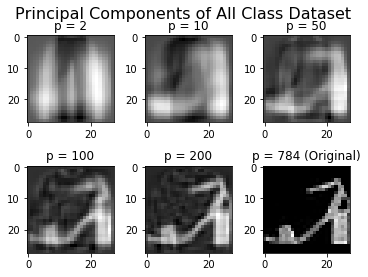

In [7]:
# Visualize PCs for all classes
sample_image = X_train_all_class[np.random.choice(len(X_train_all_class)), :]

pc_all_class_2 = (sample_image @ pc_all_class[:, :2] @ pc_all_class[:, :2].T)
pc_all_class_10 = (sample_image @ pc_all_class[:, :10] @ pc_all_class[:, :10].T)
pc_all_class_50 = (sample_image @ pc_all_class[:, :50] @ pc_all_class[:, :50].T)
pc_all_class_100 = (sample_image @ pc_all_class[:, :100] @ pc_all_class[:, :100].T)
pc_all_class_200 = (sample_image @ pc_all_class[:, :200] @ pc_all_class[:, :200].T)
pc_all_class_784 = (sample_image @ pc_all_class[:, :784] @ pc_all_class[:, :784].T)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('Principal Components of All Class Dataset', fontsize = 16)
axs[0, 0].set_title('p = 2')
axs[0, 0].imshow(pc_all_class_2.reshape((28, 28)), cmap='gray')
axs[0, 1].set_title('p = 10')
axs[0, 1].imshow(pc_all_class_10.reshape((28, 28)), cmap='gray')
axs[0, 2].set_title('p = 50')
axs[0, 2].imshow(pc_all_class_50.reshape((28, 28)), cmap='gray')
axs[1, 0].set_title('p = 100')
axs[1, 0].imshow(pc_all_class_100.reshape((28, 28)), cmap='gray')
axs[1, 1].set_title('p = 200')
axs[1, 1].imshow(pc_all_class_200.reshape((28, 28)), cmap='gray')
axs[1, 2].set_title('p = 784 (Original)')
axs[1, 2].imshow(pc_all_class_784.reshape((28, 28)), cmap='gray')

In [8]:
# Logistic regression via stochastic gradient descent


class LogisticRegression:   
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-1 * x))
        #return .5 * (1 + np.tanh(.5 * x))
    
    @staticmethod
    def loss(X, y, w): 
        # Calculate all y_hat in a batch in matrix [n, k]
        y_hat = LogisticRegression.sigmoid(np.dot(X, w))
        # Calculate cross-entropy loss
        return -1 * (np.dot(y.T, np.log(y_hat + 1E-8)) + np.dot((1 - y).T, np.log(1 - y_hat + 1E-8))).item()
    
    @staticmethod
    def loss_gradient(X, y, w): 
        y_hat = LogisticRegression.sigmoid(np.dot(X, w))
        diff = y - y_hat
        # Caulculate gradient
        gradient = np.dot(X.T, diff)
        return -1 * gradient

    @staticmethod
    def predict(X, w):
        y = LogisticRegression.sigmoid(np.dot(X, w))
        # Yield categorical prediction results
        return np.array([0 if score <= 0.5 else 1 for score in y]).reshape(-1, 1)

    @staticmethod
    def batch(X, y, num_batch, index):
        # Non-uniform batch
        X_folds = np.vsplit(X, num_batch)
        y_folds = np.split(y, num_batch)
        X_val_set = X_folds[index]
        y_val_set = y_folds[index]
        X_train_set = [X_folds[i] for i in range(len(X_folds)) if i != index]
        y_train_set = [y_folds[i] for i in range(len(y_folds)) if i != index]

        return X_train_set, y_train_set, X_val_set, y_val_set

    @staticmethod
    def accuracy(y_output, y_target): 
        count = [1 if output == target else 0 for output, target in zip(y_output, y_target)]
        return sum(count) / len(y_output)

In [150]:
# [1/2] Training - T-shirt & Boots

# Number of PCs
p = 400

# Hyper-parameters
learning_rate = 0.01
num_batch = 10
epoch = 100



loss_training_folds = np.zeros((num_batch,epoch))
loss_val_folds = np.zeros((num_batch,epoch))

# Perform PCA on every X_train batch
X_train_tshirt_boot_pc = np.vstack([np.ones(len(X_train_tshirt_boot)), (X_train_tshirt_boot @ pc_tshirt_boot[:,:p]).T]).T
X_test_tshirt_boot_pc = np.vstack([np.ones(len(X_test_tshirt_boot)), (X_test_tshirt_boot @ pc_tshirt_boot[:,:p]).T]).T 

In [151]:
best_loss = float('inf')
best_w = np.zeros((p + 1, 1))


# Train <num_batch> rounds
for i in range(num_batch):
    # Disassemble X_train and Y_train into <num_batch> batches, and select folds based on i.
    X_train_set, y_train_set, X_val_set, y_val_set = LogisticRegression.batch(X_train_tshirt_boot_pc, y_train_tshirt_boot, num_batch, i)
    
    # Reset w
    w = np.zeros((p + 1, 1))
    
    # Train <epoch> rounds with 9 folds of X_train_set and 1 fold of X_val_set
    for trial in range(epoch):
        
        # Randomize the order of the indices into the training set
        shuffled_indices = np.random.permutation(len(X_train_set))
        
        # Decrease W value every folds, prevent over fitting as well
        for j in shuffled_indices:
            w = w - learning_rate * LogisticRegression.loss_gradient(X_train_set[j], y_train_set[j], w)
     
        # Predict with X_val_set using trained W and compare with target
        fold_loss = LogisticRegression.loss(X_val_set, y_val_set, w) / X_val_set.shape[0]
        
        #record train_set val_set loss for every epoch
        total_train = np.concatenate(X_train_set, axis=0)
        total_label = np.concatenate(y_train_set, axis=0)
        loss_training_folds[i,trial] = LogisticRegression.loss(total_train, total_label, w) / total_train.shape[0]
        loss_val_folds[i,trial] = fold_loss
        
        # save best model based on val_set performace for every epoch
        if (fold_loss < best_loss):
            best_loss = fold_loss
            best_w = w
        
        
        

w = best_w
        
# Testing with test set
y_test_prediction = LogisticRegression.predict(X_test_tshirt_boot_pc, w)

print("Final accuracy: ", LogisticRegression.accuracy(y_test_prediction, y_test_tshirt_boot)*100,"%")



Final accuracy:  99.95 %


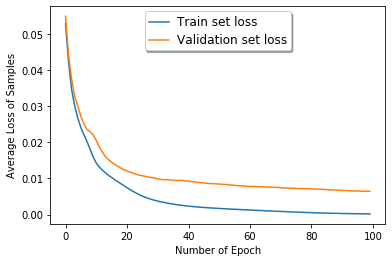

In [152]:

train_loss_mean = np.mean(loss_training_folds, axis = 0)
val_loss_mean = np.mean(loss_val_folds,axis=0)

fig,ax = plt.subplots()
ax.plot(np.arange(0,100),train_loss_mean,label="Train set loss")

ax.plot(np.arange(0,100),val_loss_mean,label="Validation set loss")

legend = ax.legend(loc='upper center', shadow=True)

for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel("Number of Epoch",size=10.0)
plt.ylabel("Average Loss of Samples",size=10)
plt.savefig("boot_tshirt.jpg")
plt.show()

In [229]:
# [2/2] Training - Pullover & Coat

# Number of PCs
p = 100

# Hyper-parameters
learning_rate = 0.0001
num_batch = 10
epoch = 100

loss_training_folds = np.zeros((num_batch,epoch))
loss_val_folds = np.zeros((num_batch,epoch))



X_train_pullover_coat_pc = np.vstack([np.ones(len(X_train_pullover_coat)), (X_train_pullover_coat @ pc_pullover_coat[:,:p]).T]).T
X_test_pullover_coat_pc = np.vstack([np.ones(len(X_test_pullover_coat)), (X_test_pullover_coat @ pc_pullover_coat[:,:p]).T]).T

In [230]:
best_loss = float('inf')
best_w = np.zeros((p + 1, 1))

# Train <num_batch> rounds
for i in range(num_batch):
    # Disassemble X_train and Y_train into <num_batch> batches, and select folds based on i.
    X_train_set, y_train_set, X_val_set, y_val_set = LogisticRegression.batch(X_train_pullover_coat_pc, y_train_pullover_coat, num_batch, i)
    
    # Reset w
    w = np.zeros((p + 1, 1))
    
    # Train <epoch> rounds with 9 folds of X_train_set and 1 fold of X_val_set
    for trial in range(epoch):
        
        # Randomize the order of the indices into the training set
        shuffled_indices = np.random.permutation(len(X_train_set))
        
        # Decrease W value every folds, prevent over fitting as well
        for j in shuffled_indices:
            w = w - learning_rate * LogisticRegression.loss_gradient(X_train_set[j], y_train_set[j], w)
        
        # Predict with X_val_set using trained W and compare with target
        fold_loss = LogisticRegression.loss(X_val_set, y_val_set, w) / X_val_set.shape[0]
        
        #record train_set val_set loss for every epoch
        total_train = np.concatenate(X_train_set, axis=0)
        total_label = np.concatenate(y_train_set, axis=0)
        loss_training_folds[i,trial] = LogisticRegression.loss(total_train, total_label, w) / total_train.shape[0]
        loss_val_folds[i,trial] = fold_loss
        
        
    
        if (fold_loss < best_loss):
            best_loss = fold_loss
            best_w = w

        
w = best_w

# Testing with test set
y_test_prediction = LogisticRegression.predict(X_test_pullover_coat_pc, w)

print("final accuracy:", LogisticRegression.accuracy(y_test_prediction, y_test_pullover_coat)*100,"%")

final accuracy: 84.65 %


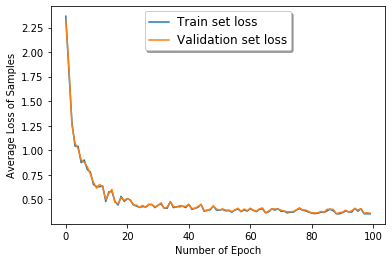

In [231]:
train_loss_mean = np.mean(loss_training_folds, axis = 0)
val_loss_mean = np.mean(loss_val_folds,axis=0)

fig,ax = plt.subplots()
ax.plot(np.arange(0,100),train_loss_mean,label="Train set loss")

ax.plot(np.arange(0,100),val_loss_mean,label="Validation set loss")

legend = ax.legend(loc='upper center', shadow=True)

for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel("Number of Epoch",size=10.0)
plt.ylabel("Average Loss of Samples",size=10)
plt.savefig("pullover_coat.jpg")
plt.show()

In [233]:
# Softmax Regression

class SoftmaxRegression: 
    
    # Divide data into batches
    @staticmethod
    def batch(X, y, num_batch, index):
        # Non-uniform batch
        X_folds = np.vsplit(X, num_batch)
        y_folds = np.split(y, num_batch)
        X_val_set = X_folds[index]
        y_val_set = y_folds[index]
        X_train_set = [X_folds[i] for i in range(len(X_folds)) if i != index]
        y_train_set = [y_folds[i] for i in range(len(y_folds)) if i != index]

        return X_train_set, y_train_set, X_val_set, y_val_set


    
    # soft max regression calculator
    @staticmethod
    def softmax(x): 
        # find max value for every data row
        row_max = np.amax(x,axis=1) 
        
        # prevent from value getting too big, substract every row by max.
        x = x - row_max.reshape(x.shape[0],1)
        ex = np.exp(x)
        return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)

    
    # calculate loss gradient
    @staticmethod
    def loss_gradient(X, y,w): 
        # batch size
        gradient = np.zeros((w.shape))
        
        # calculate predicted value
        y_hat = SoftmaxRegression.softmax(X@w)
        
        #sum for all piece of N, calculate a weight matrix
        for i in range(X.shape[0]):
            v1 = X[i].T
            diff = y[i] - y_hat[i]
            gradient = gradient + np.outer(v1,diff)

        return -1* gradient

    
    # calculate total loss for a batch
    @staticmethod
    def loss(X, y, w):    
        y_hat = SoftmaxRegression.softmax(X@w)
        y_ylog = y * np.log(y_hat + 0.000000000001)
        return -1 * np.sum(y_ylog)
    
    @staticmethod
    def predict(W,X):
        # Y predict using W
        Y = SoftmaxRegression.softmax(X@W)

        # extract every row and find it's max value's index
        for i in range(Y.shape[0]):
            ind = np.argmax(Y[i])
            # set every other value to zero, max value is one.
            for j in range(len(Y[i])):
                Y[i,j] = 0
            Y[i][ind] = 1
        return Y
    
    @staticmethod
    def accuracy(y_output, y_target): 
        n = y_output.shape[0]
        c = 0
        for i in range(y_output.shape[0]):
            if np.array_equal(y_output[i],y_target[i]):
                c = c + 1
        return c/n


In [348]:
p = 300

# Hyper-parameters
learning_rate = 0.5
num_batch = 10
epoch = 100


loss_training_folds = np.zeros((num_batch,epoch))
loss_val_folds = np.zeros((num_batch,epoch))



X_train_all_class_pc = np.vstack([np.ones(len(X_train_all_class)), (X_train_all_class @ pc_all_class[:,:p]).T]).T
X_test_all_class_pc = np.vstack([np.ones(len(X_test_all_class)), (X_test_all_class @ pc_all_class[:,:p]).T]).T
print(X_train_all_class_pc.shape)


(60000, 301)


In [349]:

best_loss = float('inf')
best_w = np.zeros((p + 1, 10))

# Train <num_batch> rounds
for i in range(num_batch):
    print("num of batch:",i)
    # Disassemble X_train and Y_train into <num_batch> batches, and select folds based on i.
    X_train_set, y_train_set, X_val_set, y_val_set = SoftmaxRegression.batch(X_train_all_class_pc, y_train_all_class, num_batch, i)
    
    # Reset w
    w = np.zeros((p+1, 10))
    
    # Train <epoch> rounds with 9 folds of X_train_set and 1 fold of X_val_set
    for trial in range(epoch):
        
        # Randomize the order of the indices into the training set
        shuffled_indices = np.random.permutation(len(X_train_set))
        # Decrease W value every folds, prevent over fitting as well
        
        for j in shuffled_indices:
            w = w - learning_rate * SoftmaxRegression.loss_gradient(X_train_set[j], y_train_set[j], w)

        # Predict with X_val_set using trained W and compare with target
        fold_loss = SoftmaxRegression.loss(X_val_set, y_val_set, w)/ (10*X_val_set.shape[0])
        
        total_train = np.concatenate(X_train_set, axis=0)
        total_label = np.concatenate(y_train_set, axis=0)
        loss_training_folds[i,trial] = SoftmaxRegression.loss(total_train, total_label, w) / (total_train.shape[0]*10)
        loss_val_folds[i,trial] = fold_loss

        if (fold_loss < best_loss):
            best_loss = fold_loss
            best_w = w


w = best_w
            
y_test_prediction = SoftmaxRegression.predict(w,X_test_all_class_pc)
print("final accuracy",SoftmaxRegression.accuracy(y_test_prediction,y_test_all_class)*100,"%")


num of batch: 0
num of batch: 1
num of batch: 2
num of batch: 3
num of batch: 4
num of batch: 5
num of batch: 6
num of batch: 7
num of batch: 8
num of batch: 9
final accuracy 77.08 %


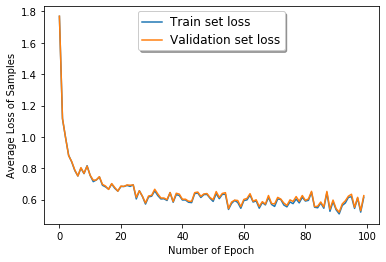

In [347]:
train_loss_mean = np.mean(loss_training_folds, axis = 0)
val_loss_mean = np.mean(loss_val_folds,axis=0)

fig,ax = plt.subplots()
ax.plot(np.arange(0,100),train_loss_mean,label="Train set loss")

ax.plot(np.arange(0,100),val_loss_mean,label="Validation set loss")

legend = ax.legend(loc='upper center', shadow=True)

for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel("Number of Epoch",size=10.0)
plt.ylabel("Average Loss of Samples",size=10)
plt.savefig("all_class.jpg")
plt.show()

(784, 10)


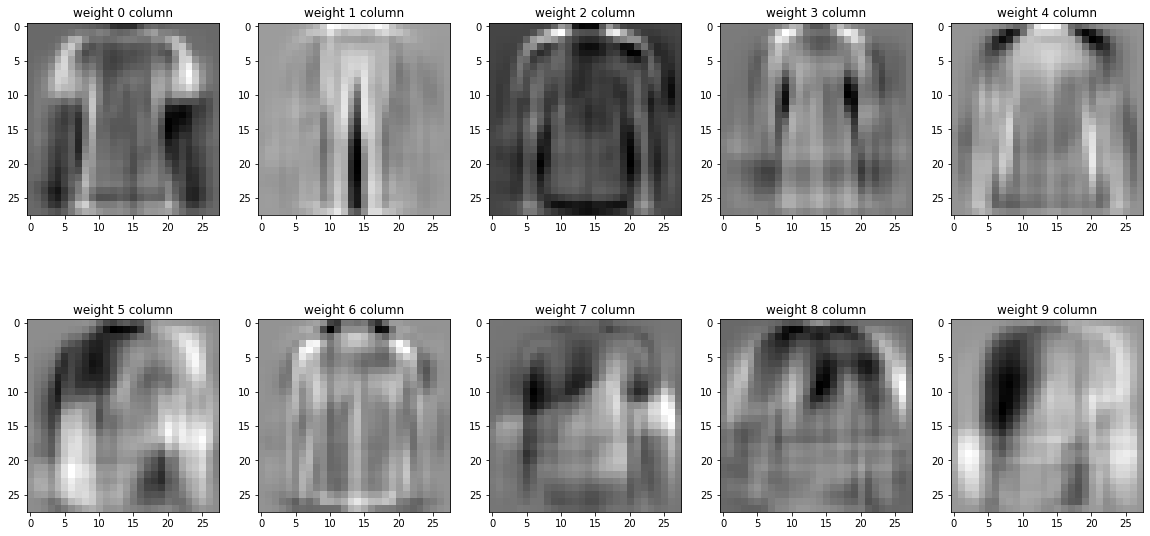

In [337]:
#(X_train_all_class @ pc_all_class[:,:p]).shape
#pc_all_class[:,:p].shape
weight_no_bias = w[1:51,:]
weight_visual = (pc_all_class[:,:50] @ weight_no_bias)

print(weight_visual.shape)

f, axs = plt.subplots(2,5,figsize=(20,10))
#axs[0, 0].imshow(weight_visual[0].reshape((28, 28)), cmap='gray')
axs[0,0].imshow(weight_visual[:,0].reshape((28,28)),cmap='gray')
axs[0,0].set_title('weight 0 column')
axs[0,1].imshow(weight_visual[:,1].reshape((28,28)),cmap='gray')
axs[0,1].set_title('weight 1 column')
axs[0,2].imshow(weight_visual[:,2].reshape((28,28)),cmap='gray')
axs[0,2].set_title('weight 2 column')
axs[0,3].imshow(weight_visual[:,3].reshape((28,28)),cmap='gray')
axs[0,3].set_title('weight 3 column')
axs[0,4].imshow(weight_visual[:,4].reshape((28,28)),cmap='gray')
axs[0,4].set_title('weight 4 column')
axs[1,0].imshow(weight_visual[:,5].reshape((28,28)),cmap='gray')
axs[1,0].set_title('weight 5 column')
axs[1,1].imshow(weight_visual[:,6].reshape((28,28)),cmap='gray')
axs[1,1].set_title('weight 6 column')
axs[1,2].imshow(weight_visual[:,7].reshape((28,28)),cmap='gray')
axs[1,2].set_title('weight 7 column')
axs[1,3].imshow(weight_visual[:,8].reshape((28,28)),cmap='gray')
axs[1,3].set_title('weight 8 column')
axs[1,4].imshow(weight_visual[:,9].reshape((28,28)),cmap='gray')
axs[1,4].set_title('weight 9 column')

f.savefig("weights.jpg")